In [1]:
import tensorflow as tf
import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data=np.linspace(-1,1,100)
y_data=2*x_data+1.0+np.random.randn(*x_data.shape)*0.4

w=tf.Variable(np.random.randn(),tf.float32)
b=tf.Variable(0.0,tf.float32)

2023-03-09 19:19:59.167385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def model(x,w,b):
    return tf.multiply(x,w)+b
def loss_function(x,y,w,b):
    return tf.reduce_mean(tf.square(model(x,w,b)-y))
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        return tape.gradient(loss_function(x,y,w,b),[w,b])

training epoch: 01, step: 010 loss= 0.013749
training epoch: 01, step: 020 loss= 0.239504
training epoch: 01, step: 030 loss= 0.136429
training epoch: 01, step: 040 loss= 1.332112
training epoch: 01, step: 050 loss= 0.367078
training epoch: 01, step: 060 loss= 0.615762
training epoch: 01, step: 070 loss= 1.294028
training epoch: 01, step: 080 loss= 0.585631
training epoch: 01, step: 090 loss= 0.257511
training epoch: 01, step: 100 loss= 0.808249
training epoch: 02, step: 110 loss= 0.574612
training epoch: 02, step: 120 loss= 0.005102
training epoch: 02, step: 130 loss= 0.028457
training epoch: 02, step: 140 loss= 0.371781
training epoch: 02, step: 150 loss= 0.001932
training epoch: 02, step: 160 loss= 0.043510
training epoch: 02, step: 170 loss= 0.316927
training epoch: 02, step: 180 loss= 0.047249
training epoch: 02, step: 190 loss= 0.000237
training epoch: 02, step: 200 loss= 0.238476
training epoch: 03, step: 210 loss= 0.308672
training epoch: 03, step: 220 loss= 0.000450
training e

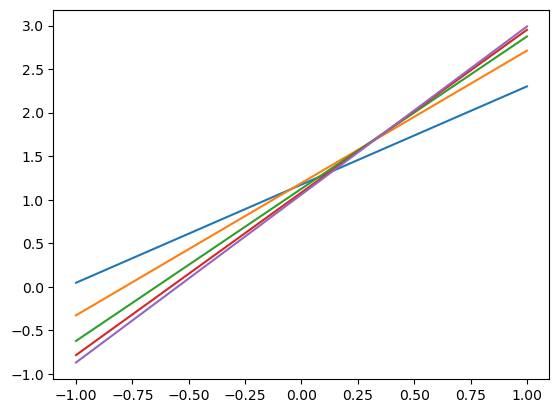

In [4]:
learning_rate=0.01
step=0
display_step=10
loss_list=[]

training_epochs=5
for epoch in range(training_epochs):
    for xs,ys in zip(x_data,y_data):
        loss_list.append(loss_function(xs,ys,w,b))
        delta_w,delta_b=grad(xs,ys,w,b)
        w.assign_sub(delta_w*learning_rate)
        b.assign_sub(delta_b*learning_rate)
        step=step+1
        if step%display_step==0:
            print('training epoch: %02d,'%(epoch+1),'step: %03d'%step,'loss= %.6f'%loss_function(xs,ys,w,b))
    plt.plot(x_data,w.numpy()*x_data+b.numpy())


In [5]:
x_test=3.21
predict=model(x_test,w.numpy(),b.numpy())
print('predict value:%f'%predict)
target=2*x_test+1.0
print('goal value:%f'%target)

predict value:7.252503
goal value:7.420000
